In [40]:
import numpy as np
from scipy.stats import pearsonr, zscore
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import csv
import json

In [54]:
def generateDataset(rho,n=100):
    r = np.array([[1, rho],[rho, 1]])
    y = np.random.multivariate_normal([0.0,0.0], r, size=n)
#     print(y)
#     y = y - np.mean(y,axis=0)
#     print(np.mean(y,axis=0))
    x = y[:,0]
    y = y[:,1]
    
    # ensure centering
    x = x - np.mean(x)
    y = y - np.mean(y)
    
    # ensure equal variance
    x = zscore(x)
    y = zscore(y)
    
    plt.scatter(x,y)
    plt.show()
    d = [{"x":i,"y":j} for i,j in zip(x,y)]
    calcRho = pearsonr(x,y)
    return({"data":d,"N":n,"rho":rho,"calcRho":calcRho[0]})

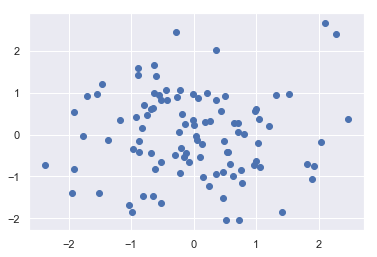

In [44]:
dat = generateDataset(0)

In [50]:
df = pd.DataFrame(dat['data'])

x   -1.332268e-17
y    2.997602e-17
dtype: float64

In [51]:
with open("variables.csv",encoding="UTF-8") as csvFile:
    csvData = [i for i in csv.DictReader(csvFile)]

In [52]:
csvDf = pd.read_csv("variables.csv")

In [53]:
csvDf

,Unit of observation,X,Y,True relationship,Political?,rho,set
0,diamonds,Weight,Price,Strongly positive,No,0.9,1
1,cities,Temperature,Crime rate,Positive,No,0.4,1
2,people,Yearly income,Height,None,No,0.0,1
3,people,Exercise amount,Body weight,Negative,No,-0.4,1
4,cities,Temperature,Sales of Mittens,Strongly Negative,No,-0.9,1
5,countries,Government spending,Budget deficit,Strongly positive,Yes,0.9,2
6,countries,Immigrant population,Economic growth,Positive,Yes,0.4,2
7,cities,Income tax rate,Poverty rate,None,Yes,0.0,2
8,companies,Labor union participation,Corporate profits,Negative,Yes,-0.4,2
9,cities,Vaccination rate,Rate of illness,Strongly Negative,Yes,-0.9,2


0.9


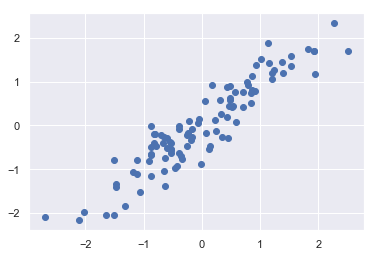

0.4


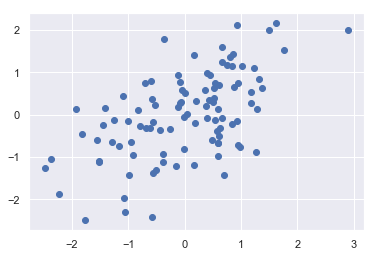

0.0


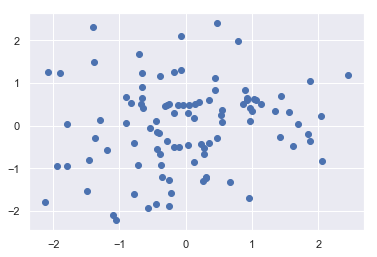

-0.4


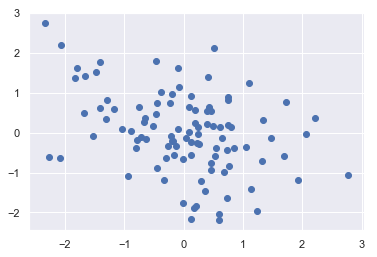

-0.9


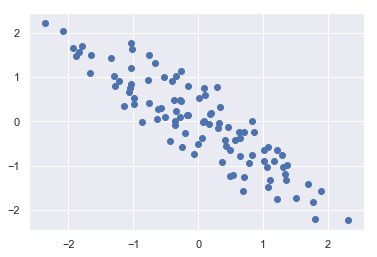

0.9


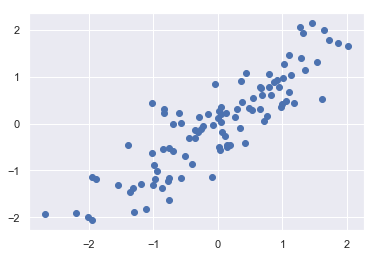

0.4


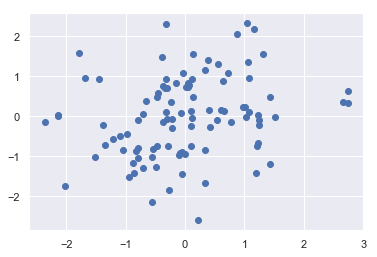

0.0


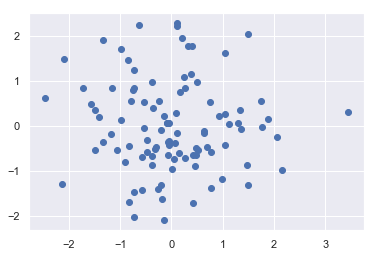

-0.4


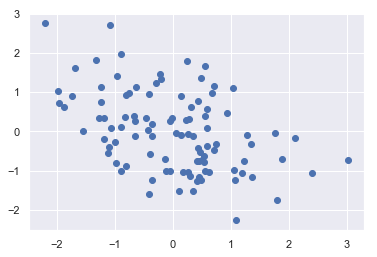

-0.9


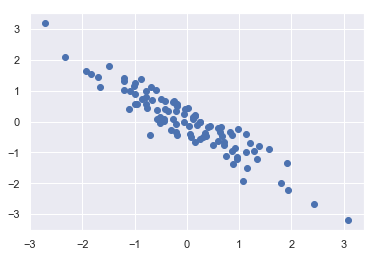

In [56]:
allData = {}
for idx,row in csvDf.iterrows():
    rho = float(row["rho"])
    print(rho)
    vars = (row["X"],row["Y"])
    data = generateDataset(rho)
    key = "_".join([i for i in vars])
    setID = row["set"]
    political = row["Political?"]
    unit = row["Unit of observation"]
    allData[key] = {
        "data":data,
        "vars":vars,
        "rho": rho,
        "set": setID,
        "political":political,
        "unitt" : unit
    }

In [57]:
with open("finalSimData.json","w") as jsonFile:
    jsonFile.write(json.dumps(allData))

# Load the datasets

In [41]:
with open("finalSimData.json","r") as jsonFile:
    allData = json.loads(jsonFile.read())

x   -2.209995
y   -2.181206
dtype: float64
x    2.278793
y    2.593998
dtype: float64
x    0.894130
y    0.941636
dtype: float64


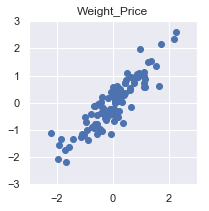

x   -1.878020
y   -2.669291
dtype: float64
x    1.931768
y    2.569688
dtype: float64
x    0.897387
y    1.020582
dtype: float64


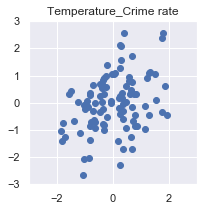

x   -2.221231
y   -2.104926
dtype: float64
x    3.023647
y    2.470559
dtype: float64
x    1.047740
y    0.977776
dtype: float64


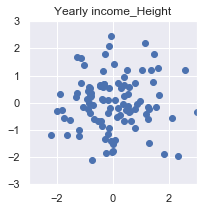

x   -1.874866
y   -2.253337
dtype: float64
x    2.952482
y    2.720374
dtype: float64
x    0.993801
y    1.028863
dtype: float64


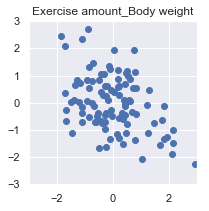

x   -2.342396
y   -2.193838
dtype: float64
x    2.397481
y    1.911820
dtype: float64
x    0.972333
y    0.966569
dtype: float64


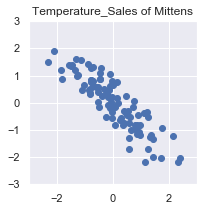

x   -2.190459
y   -2.109294
dtype: float64
x    2.842006
y    2.550706
dtype: float64
x    1.016495
y    1.017880
dtype: float64


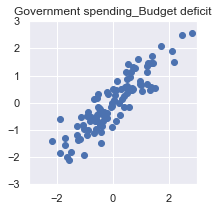

x   -2.898371
y   -2.293410
dtype: float64
x    2.236291
y    2.638713
dtype: float64
x    0.922947
y    1.019449
dtype: float64


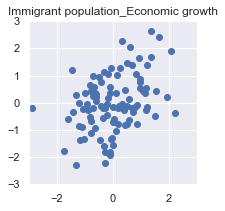

x   -2.197854
y   -2.806058
dtype: float64
x    1.786613
y    1.767803
dtype: float64
x    0.917365
y    0.952639
dtype: float64


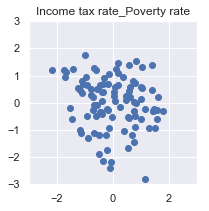

x   -2.110046
y   -2.512858
dtype: float64
x    1.745680
y    2.495499
dtype: float64
x    0.950898
y    1.018995
dtype: float64


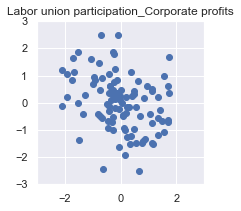

x   -2.399342
y   -2.815357
dtype: float64
x    3.259184
y    2.486502
dtype: float64
x    1.026285
y    0.969845
dtype: float64


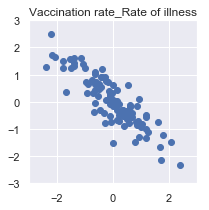

In [42]:
for i, var_name in enumerate(allData.keys()):
    df = pd.DataFrame(allData[var_name]['data']['data'])
    
    print(df.min())
    print(df.max())
    print(df.std())
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax.scatter(df.x, df.y)
    ax.set_xlim(-3,3)
    ax.set_ylim(-3,3)
    ax.set_title(var_name)
    plt.show()

# Test data

-1.0


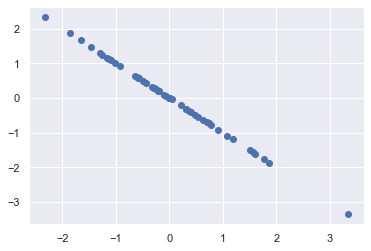

-0.9


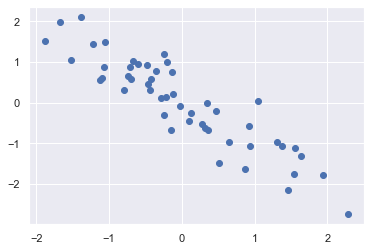

-0.8


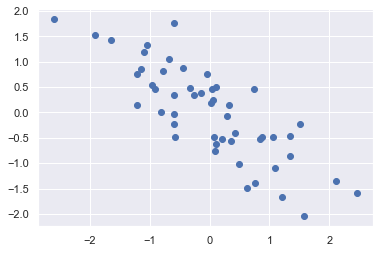

-0.7


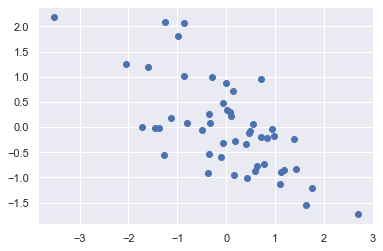

-0.6


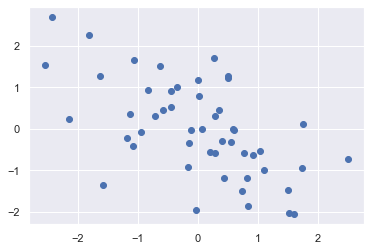

-0.5


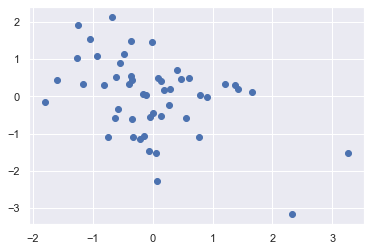

-0.4


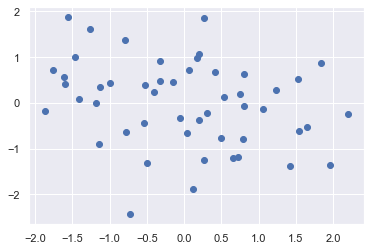

-0.3


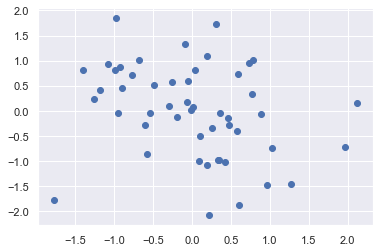

-0.2


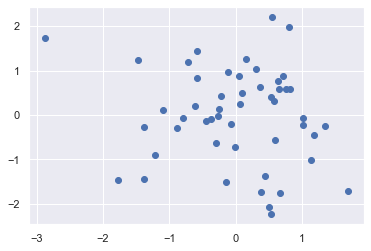

-0.1


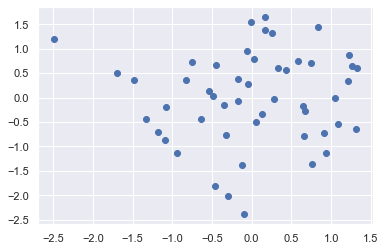

0.0


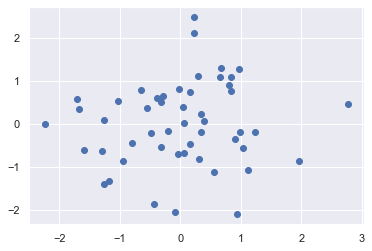

0.1


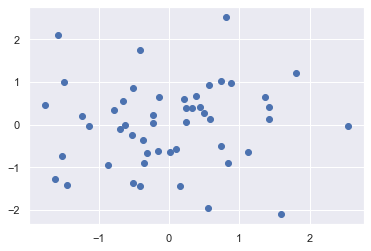

0.2


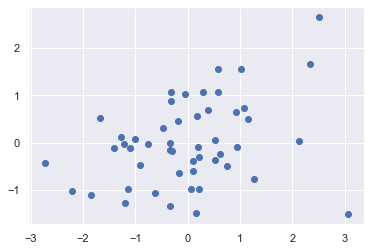

0.3


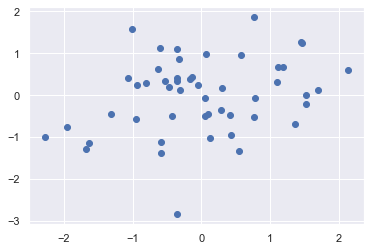

0.4


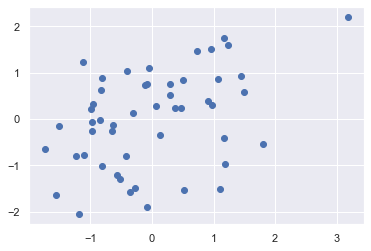

0.5


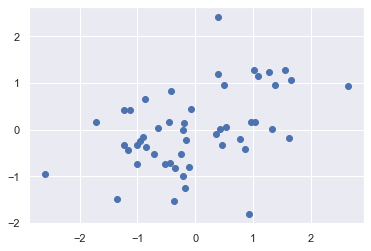

0.6


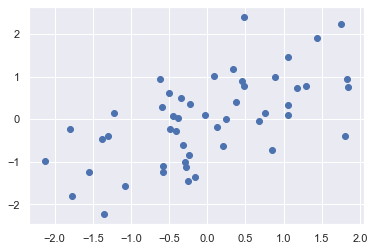

0.7


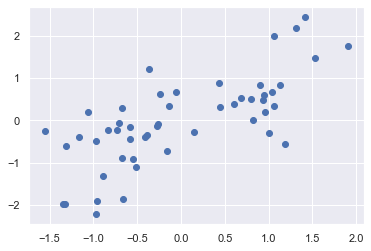

0.8


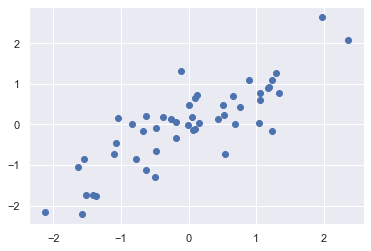

0.9


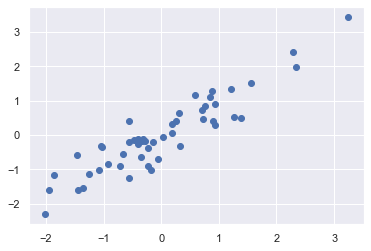

1.0


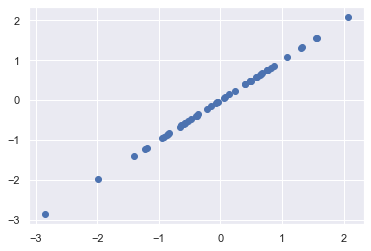

In [39]:
testData = {}
for rho in [(i-10)/10 for i in range(21)]:
    
    if np.abs(rho) < 0.000001:
        rho = 0.0
    print(rho)
    data = generateDataset(rho,n=50)
    testData[rho] = data

In [58]:
with open("testDataBand.json","w") as jsonFile:
    jsonFile.write(json.dumps(testData))

In [40]:
testData

{-1.0: {'data': [{'x': 0.5312458078507701, 'y': -0.5312458041280226},
   {'x': -1.9918652194990338, 'y': 1.9918652263489707},
   {'x': 0.38816457466891885, 'y': -0.38816457828923234},
   {'x': 1.2123965163181545, 'y': -1.2123965322625314},
   {'x': 0.3133014140757089, 'y': -0.3133014060700165},
   {'x': -1.532007195198052, 'y': 1.5320071890631586},
   {'x': -0.001459458190231272, 'y': 0.0014594629211781007},
   {'x': 1.6802200080447802, 'y': -1.6802200138616852},
   {'x': -0.38083010686671215, 'y': 0.38083012043002795},
   {'x': 0.4312851480625071, 'y': -0.43128514789400074},
   {'x': 0.6754120171747641, 'y': -0.6754120182693525},
   {'x': -0.13817470522518427, 'y': 0.13817469936664212},
   {'x': 0.15234081935650493, 'y': -0.15234081709262365},
   {'x': -0.3446011852987275, 'y': 0.34460118145935026},
   {'x': 0.8037619879641524, 'y': -0.8037619850834858},
   {'x': -1.418850842083204, 'y': 1.4188508403034912},
   {'x': -0.5613077657653692, 'y': 0.5613077801605034},
   {'x': 0.2305956638

In [32]:
from decimal import Decimal

[-1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0]